##                            EXPLORATORY DATA ANALYSIS ON RETAIL SALES DATA

# 1. DATA LOADING AND CLEANING

In [29]:
import pandas as pd
import numpy as np
#import piplite
#await piplite.install('seaborn')

In [30]:
df=pd.read_csv("/home/ammar-ahmed-siddiqui/Downloads/retail_sales_dataset.csv")

In [31]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [33]:
# list the data types for each column
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [34]:
print("Dimension of the dataset:", df.shape)
print("Size of the dataset: ", df.size)
print("Columns in the dataset: ", df.keys())

Dimension of the dataset: (1000, 9)
Size of the dataset:  9000
Columns in the dataset:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [35]:
print("Information of the dataset: \n",df.info())
print("After removing duplicates: \n",df.drop_duplicates(inplace=True)) #cleaning the data by checking the duplicates
print("Size of the dataset after removing duplicates: \n",df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 9000


In [36]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


THERE WERE NO DUPLICATES TO REMOVE
NONE OF THE COLUMN CONTAINS ANY NULL VALUE

In [37]:
# numerical columns
numerical_data = df.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)
# categorical columns
categorical_data = df.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Numerical columns:  Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')
Categorical columns:  Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


In [38]:
#CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA
gender = { "Male" : 1 , "Female" : 0}
categories = { "Clothing" : 1 , "Beauty" : 2 , "Electronics" : 0 }
df["Gender"]=df["Gender"].map(gender)
df["Product Category"]=df["Product Category"].map(categories)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,1,34,2,3,50,150
1,2,2023-02-27,CUST002,0,26,1,2,500,1000
2,3,2023-01-13,CUST003,1,50,0,1,30,30
3,4,2023-05-21,CUST004,1,37,1,1,500,500
4,5,2023-05-06,CUST005,1,30,2,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,1,62,1,1,50,50
996,997,2023-11-17,CUST997,1,52,2,3,30,90
997,998,2023-10-29,CUST998,0,23,2,4,25,100
998,999,2023-12-05,CUST999,0,36,0,3,50,150


# 2. DESCRIPTIVE STATISTICS

In [39]:
df.describe()

,Transaction ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.49000,41.39200,0.965000,2.514000,179.890000,456.000000
std,288.819436,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632
min,1.000000,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,250.750000,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,500.500000,0.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,750.250000,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,1000.000000,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000


In [40]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [41]:
for col in df.columns:
  # Check if data type is numeric (for mean, median, and standard deviation)
  if not pd.api.types.is_numeric_dtype(df[col]):
    print(f"Statistics for column '{col}' (non-numeric):")
    print(f"  Mode: {df[col].mode()[0]}")  # Most frequent value (mode)
    continue

  print(f"Statistics for column '{col}':")
  print(f"  Mean: {df[col].mean()}")
  print(f"  Median: {df[col].median()}")
  print(f"  Mode: {df[col].mode()[0]}")  # Most frequent value (mode)
  print(f"  Standard deviation: {df[col].std()}")
  print()

Statistics for column 'Transaction ID':
  Mean: 500.5
  Median: 500.5
  Mode: 1
  Standard deviation: 288.8194360957494

Statistics for column 'Date' (non-numeric):
  Mode: 2023-05-16
Statistics for column 'Customer ID' (non-numeric):
  Mode: CUST001
Statistics for column 'Gender':
  Mean: 0.49
  Median: 0.0
  Mode: 0
  Standard deviation: 0.5001501276118503

Statistics for column 'Age':
  Mean: 41.392
  Median: 42.0
  Mode: 43
  Standard deviation: 13.681429659122527

Statistics for column 'Product Category':
  Mean: 0.965
  Median: 1.0
  Mode: 1
  Standard deviation: 0.8052474299390364

Statistics for column 'Quantity':
  Mean: 2.514
  Median: 3.0
  Mode: 4
  Standard deviation: 1.1327343409145356

Statistics for column 'Price per Unit':
  Mean: 179.89
  Median: 50.0
  Mode: 50
  Standard deviation: 189.68135627129232

Statistics for column 'Total Amount':
  Mean: 456.0
  Median: 135.0
  Mode: 50
  Standard deviation: 559.997631555123



# 3. TIME SERIES ANALYSIS
SALES TRENDS OVERTIME

In [42]:
# Sales trends Overtime
import matplotlib.pyplot as plt
#from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
#df.set_index('Date', inplace=True)

In [44]:
# Plot time series data
#df['Total Amount'].plot(figsize=(12, 6))  # Replace 'sales' with your sales column name
#plt.title('Sales Over Time')
#plt.xlabel('Date')
#plt.ylabel('Sales')
#plt.grid(True)
#plt.show()


In [45]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month_name()
df["Month"]

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

In [46]:
print("New Shap of df: ",df.shape)
print("Columns of df: ",df.columns)

New Shap of df:  (1000, 10)
Columns of df:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')


In [47]:
df = df[df['Total Amount'] >= df['Price per Unit']]
print(df.shape)
# no outliers present

(1000, 10)


#     Observation 1
By using the basic steps we observe:

Total entities in the data is 1000 and 9 columns.

There are total five int64 and four objects data types.

The unique values of different columns like

Gender have two, Male and Female.
Product have three, Beauty, Clothing and Electronic.
There is no month to explore, the month from Date columns and add new column Month in dataset.

And then check the outlier.

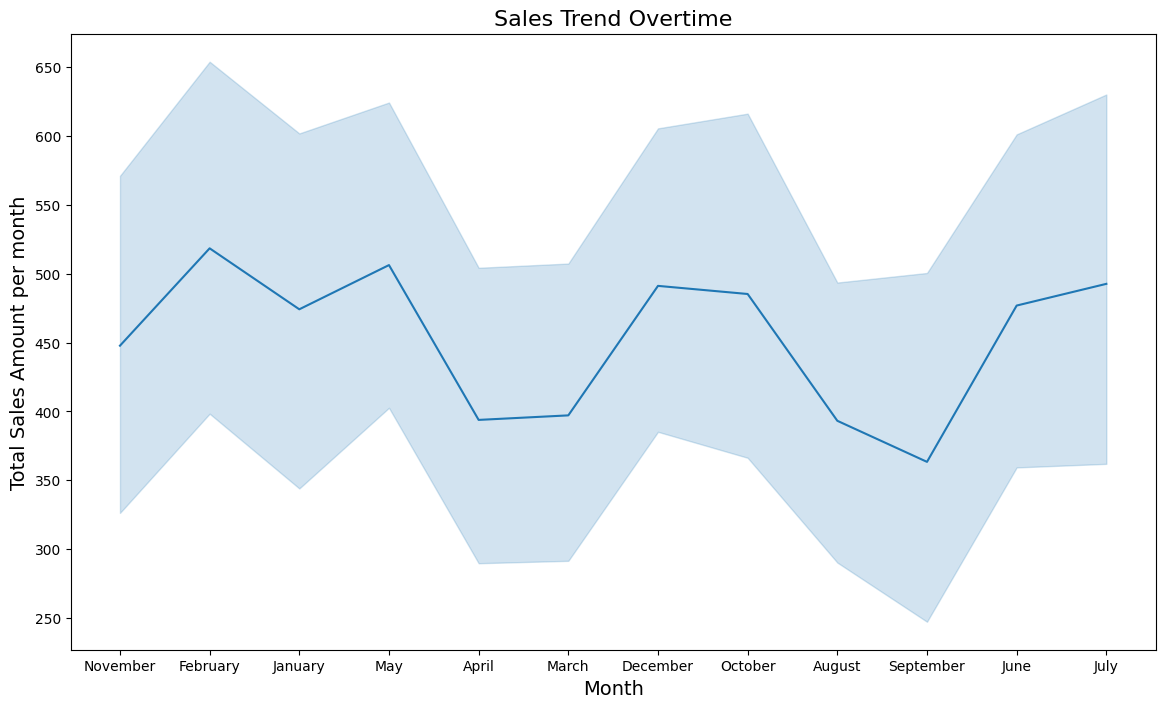

In [48]:
# Sales trends Overtime
plt.figure(figsize=(14,8))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()

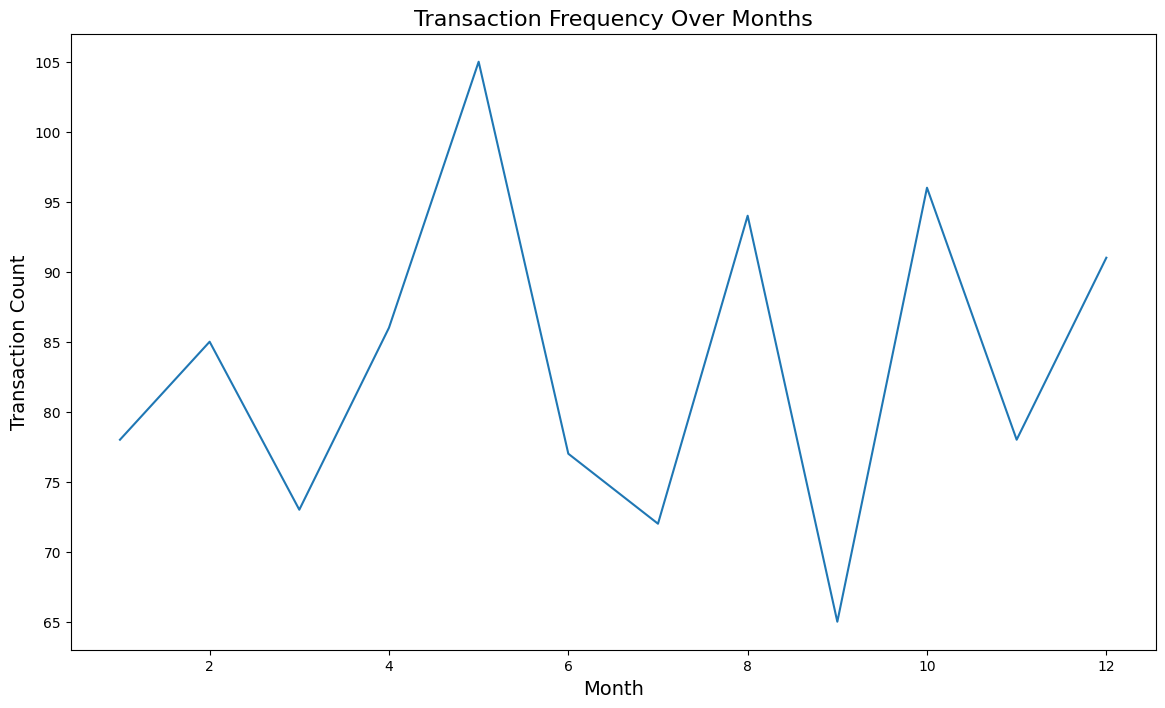

In [49]:
# transaction frequency over months

df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(14,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

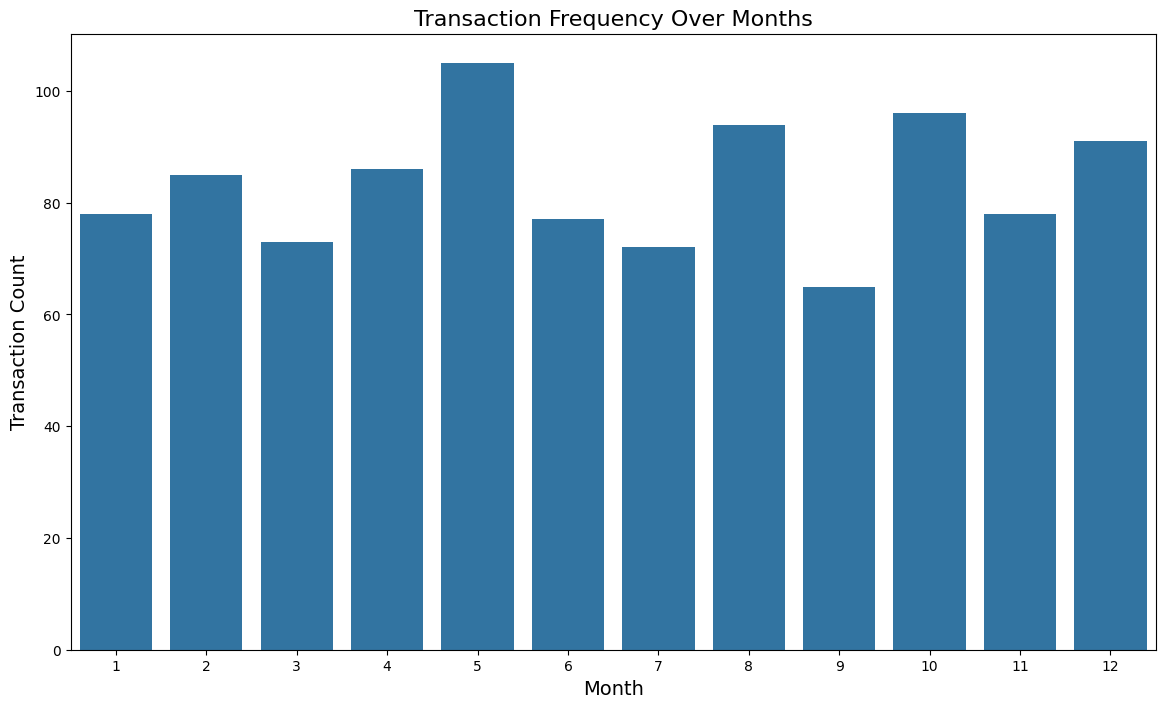

In [50]:
# bar blot
plt.figure(figsize=(14,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()


# Observation 2
By observing the above charts:

Next year will sales increase and company get in profit

Month may sale was high. There must be Spring season and people buy cloth during this season.

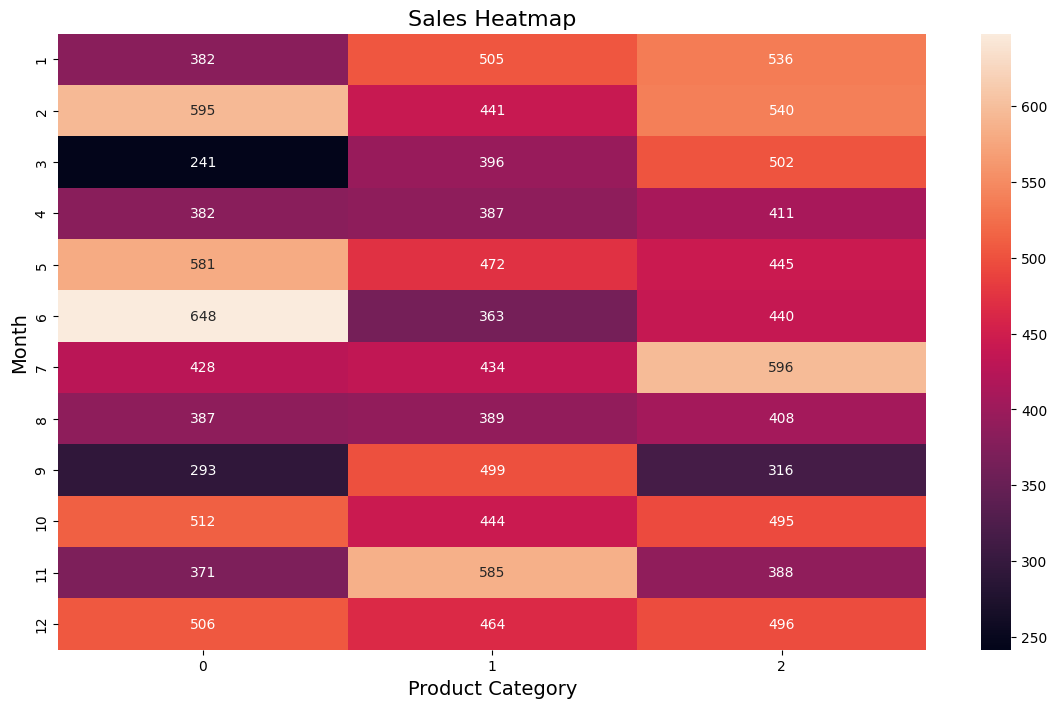

In [51]:
# Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()


# CUSTOMER AND PRODUCT ANALYSIS AND VISUALIZATION

       Customer ID         Age      Gender
count         1000  1000.00000  1000.00000
unique        1000         NaN         NaN
top        CUST001         NaN         NaN
freq             1         NaN         NaN
mean           NaN    41.39200     0.49000
std            NaN    13.68143     0.50015
min            NaN    18.00000     0.00000
25%            NaN    29.00000     0.00000
50%            NaN    42.00000     0.00000
75%            NaN    53.00000     1.00000
max            NaN    64.00000     1.00000
     Total Amount  Quantity
Age                        
18     534.047619         4
19     708.095238         4
20     411.666667         4
21     629.250000         4
22     507.407407         4
23     342.500000         4
24     361.000000         4
25     495.000000         4
26     635.454545         4
27     408.043478         4
28     412.857143         4
29     410.625000         4
30     445.000000         4
31     464.545455         3
32     292.105263         4
33     6

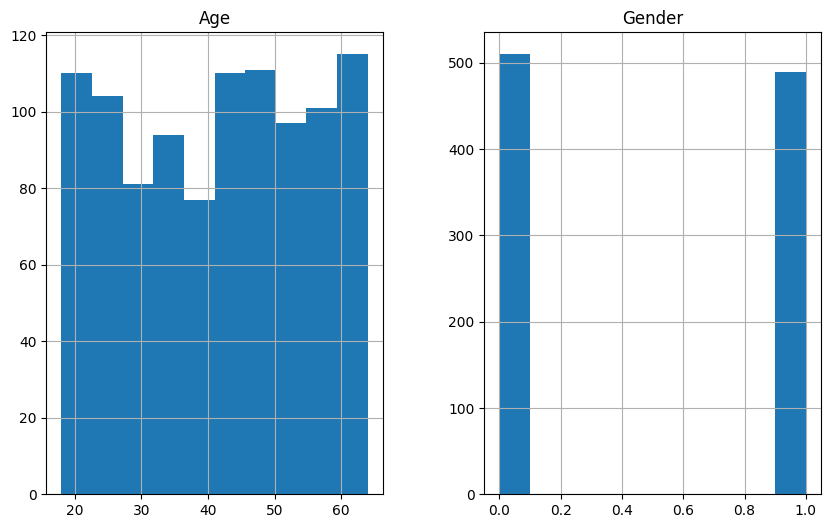

In [52]:
# Describe customer demographics 
customer_demographics = df[['Customer ID', 'Age', 'Gender']]
print(customer_demographics.describe(include='all'))  # Summary statistics

# Group by demographics and analyze purchase behavior (average spend, frequent items)
grouped_by_age = df.groupby('Age').agg({'Total Amount': 'mean', 'Quantity': 'nunique'})  

print(grouped_by_age)

# Visualize demographics (histograms, boxplots)
customer_demographics.hist(figsize=(10, 6))  # Histogram of age
plt.show()

In [53]:
# Total sales
total_sales = df['Total Amount'].sum()
print(f"Total sales: ${total_sales:.2f}")

# Sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum()
print(f"\nTop 3 selling categories:")
print(category_sales.sort_values(ascending=False).head(3))

# Customer purchase frequency
customer_frequency = df.groupby('Customer ID')['Transaction ID'].count()
print(f"\nAverage purchase frequency per customer: {customer_frequency.mean():.2f}")

Total sales: $456000.00

Top 3 selling categories:
Product Category
0    156905
1    155580
2    143515
Name: Total Amount, dtype: int64

Average purchase frequency per customer: 1.00


Total Sales: $456000.00


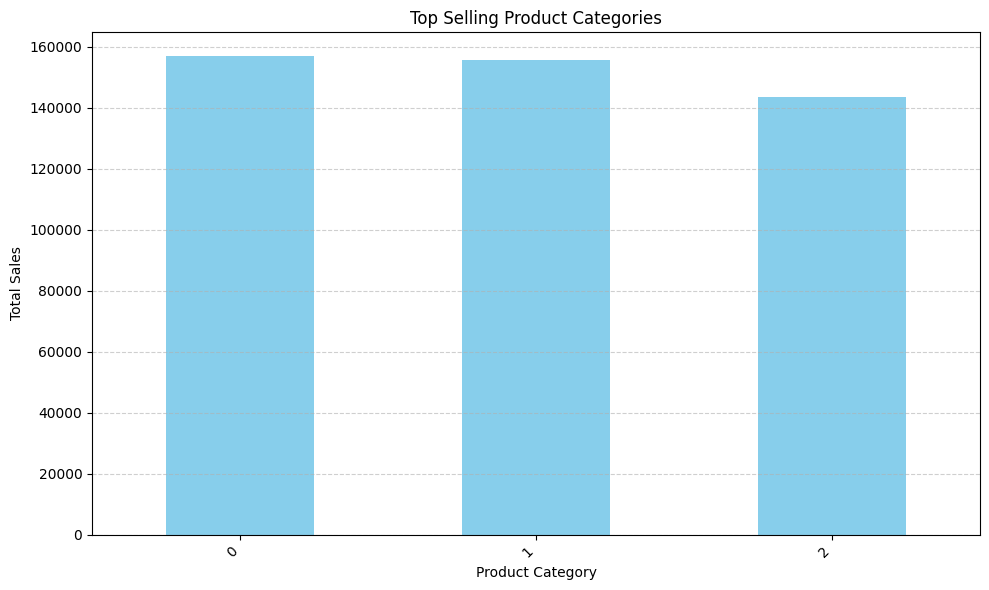

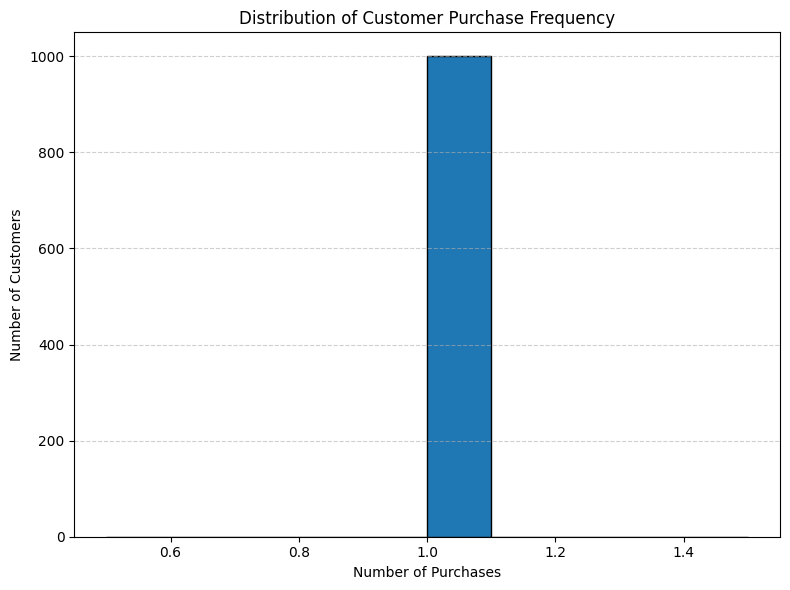

In [54]:
# Total Sales
total_sales = df['Total Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum()

# Plot Top 5 Selling Categories (Bar Chart)
top_5_categories = category_sales.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Customer Purchase Frequency
customer_frequency = df.groupby('Customer ID')['Transaction ID'].count()

# Distribution of Purchase Frequency (Histogram)
plt.figure(figsize=(8, 6))
customer_frequency.plot.hist(bins=10, edgecolor='black')  # Adjust 'bins' for desired granularity
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Average Purchase Value per Customer
avg_purchase_value = df.groupby('Customer ID')['Total Amount'].mean()

In [55]:
# Analyze by Gender:

# Average purchase value by gender
avg_purchase_value_gender = df.groupby('Gender')['Total Amount'].mean()
print(f"\nAverage purchase value by gender:")
print(avg_purchase_value_gender)

# Purchase frequency by gender
purchase_frequency_gender = df.groupby('Gender')['Transaction ID'].count()
print(f"\nPurchase frequency by gender:")
print(purchase_frequency_gender)

# ... (similar analysis for other metrics like total spending per gender)

# Analyze by Age Group:

# Bin age into groups (replace with your desired age ranges)
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 65, 100])




Average purchase value by gender:
Gender
0    456.549020
1    455.428571
Name: Total Amount, dtype: float64

Purchase frequency by gender:
Gender
0    510
1    490
Name: Transaction ID, dtype: int64


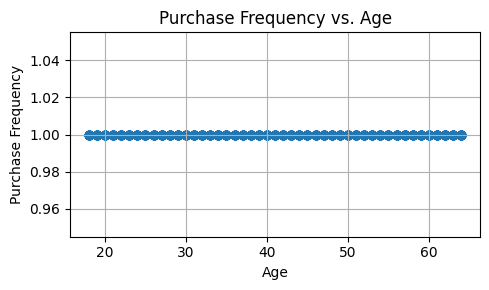

In [56]:
customer_frequency = df.groupby('Customer ID')['Transaction ID'].count()
plt.figure(figsize=(5, 3))
plt.scatter(df['Age'], customer_frequency)
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
df.to_csv("/home/ammar-ahmed-siddiqui/Downloads/EDA_retail.csv")

# RECOMENDATION

Overall obervsed
While clothing is the best-selling category in terms of quantity, electronics generates the most revenue, closely followed by clothing.

Clothing: This category generates the most revenue for women. Men purchase more than women in terms of quantity but spend less on average in this category.

Electronic: This categoty men buy less than women in terms of quantity, but spend more on average in this category.

Beauty: This is the category with the lowest revenue and the lowest sales. In this category, revenue is higher for women than for men.

# AUTHOR

FARYAL SHAKEEL
BS-COMPUTER SCIENCE

OASIS-INFOBYTES DATA ANALYTICS INTERNSHIP
TASK 1 RETAIL SALES ANALYSIS